<a href="https://colab.research.google.com/github/camelliatea/dicoding-proyek-analisis-data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Elita Camellia
- **Email:** elita.camellia@binus.ac.id
- **ID Dicoding:** elcamelliaa

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah pengguna casual dan registered di berbagai musim?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur dalam dua tahun terakhir?
- Bagaimana hubungan antara suhu sebenarnya dan suhu yang dirasakan terhadap jumlah peminjaman sepeda?
- Bagaimana pengaruh kelembaban dan kecepatan angin terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
day_df = pd.read_csv('/content/drive/My Drive/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

day_df mengandung informasi tentang jumlah peminjaman sepeda berdasarkan berbagai faktor, seperti waktu, cuaca, dan jenis pengguna. Setiap entri mencatat tanggal, musim, hari kerja atau libur, hingga kondisi suhu, kelembaban, dan kecepatan angin, termasuk membedakan pengguna menjadi pengguna registered (terdaftar) dan casual (tidak terdaftar).

### Assessing Data

**Menilai Tabel ` day_df`**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari 731 baris dan 15 kolom.
- Dataset tidak mengandung missing value dan duplikasi data, serta tidak menunjukkan adanya keanehan pada parameter statistiknya.
- Variabel dteday perlu dikonversi menjadi tipe data datetime.
- Variabel yr, mnth, weathersit, dan weekday dapat diperjelas keterangannya dengan melakukan konversi menjadi tipe data kategoris.
- Variabel temp, atemp, hum, dan windspeed dapat didenormalisasi untuk memudahkan interpretasi.




### Cleaning Data

**Merevisi nama beberapa kolom**

In [8]:
day_df = day_df.rename(columns={
    'yr': 'year',
    'dteday': 'date',
    'mnth': 'month',
    'cnt': 'count',
    'weathersit': 'weather',
    'hum': 'humidity'
    })

**Melakukan konversi variabel `date` menjadi tipe data datetime**

In [9]:
day_df['date'] = pd.to_datetime(day_df['date'])

**Merubah keterangan nilai pada variabel `month` dan `weekday`**

In [10]:
# mengekstrak nilai month dan day
day_df['month'] = day_df['date'].dt.month_name()
day_df['weekday'] = day_df['date'].dt.day_name()

# mengurutkan weekday dan month dengan urutan teratur
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

day_df['month'] = pd.Categorical(day_df['month'], categories=month_order, ordered=True)

weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday']
day_df['weekday'] = pd.Categorical(day_df['weekday'], categories=weekday_order, ordered=True)

**Merevisi keterangan nilai pada variabel `season `, `year`, dan `weather`**

In [11]:
# memetakan nilai lama ke nilai baru
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['weather'] = day_df['weather'].map({
    1: 'Clear', 2: 'Misty', 3: 'Light Rain/Snow', 4: 'Severe'
})

day_df['workingday'] = day_df['workingday'].map({
    1: 'Working Day', 0:'Holiday'
})

**Mengonversi variabel `weekday` dan `season` menjadi tipe data kategoris**

In [12]:
to_categorical = ['season', 'year', 'weather', 'workingday']
day_df[to_categorical] = day_df[to_categorical].astype('category')

**Melakukan denormalisasi pada variabel` temp`,` atemp`, `humidity`, dan `windspeed`**




In [13]:
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

**Menambahkan variabel bins untuk setiap pengguna**

Ini diperlukan saat analisis clustering.

In [14]:
# Menentukan batas bins berdasarkan distrbusi data
bins = [0, 3000, 6000, 9000]
labels = ['Low', 'Medium', 'High']

# Membuat variabel bins
day_df['count_bins'] = pd.cut(day_df['count'], bins=bins, labels=labels, include_lowest=True)

day_df['casual_bins'] = pd.cut(day_df['casual'], bins=bins, labels=labels, include_lowest=True)

day_df['registered_bins'] = pd.cut(day_df['registered'], bins=bins, labels=labels, include_lowest=True)

**Memeriksa kembali dataset**

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   date             731 non-null    datetime64[ns]
 2   season           731 non-null    category      
 3   year             731 non-null    category      
 4   month            731 non-null    category      
 5   holiday          731 non-null    int64         
 6   weekday          731 non-null    category      
 7   workingday       731 non-null    category      
 8   weather          731 non-null    category      
 9   temp             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  humidity         731 non-null    float64       
 12  windspeed        731 non-null    float64       
 13  casual           731 non-null    int64         
 14  registered       731 non-null    int64    

In [16]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_bins,casual_bins,registered_bins
0,1,2011-01-01,Spring,2011,January,0,Saturday,Holiday,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,Low,Low,Low
1,2,2011-01-02,Spring,2011,January,0,Sunday,Holiday,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,Low,Low,Low
2,3,2011-01-03,Spring,2011,January,0,Monday,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Low,Low,Low
3,4,2011-01-04,Spring,2011,January,0,Tuesday,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Low,Low,Low
4,5,2011-01-05,Spring,2011,January,0,Wednesday,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Low,Low,Low


In [17]:
day_df.to_csv('all_data.csv', index=False)

**Insight:**
- Dengan merevisi nama dan keterangan nilai pada beberapa variabel, dataset menjadi lebih jelas dan lebih mudah dipahami.
- Setelah menyesuaikan tipe data di beberapa kolom, kecepatan proses meningkat dan proses analisis menjadi  lebih cepat.

## Exploratory Data Analysis (EDA)

### Explore dataset `day_df`

**Jumlah peminjaman sepeda tahun 2011 dan 2012**

In [18]:
day_df.groupby(by='year', observed=True).agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

casual                        registered                          \
         sum   max min         mean        sum   max  min         mean   
year                                                                     
2011  247252  3065   9   677.402740     995851  4614  416  2728.358904   
2012  372765  3410   2  1018.483607    1676811  6946   20  4581.450820   

        count                          
          sum   max  min         mean  
year                                   
2011  1243103  6043  431  3405.761644  
2012  2049576  8714   22  5599.934426

Insight:

- Pada tahun 2011, peminjaman sepeda berkisar 431-6043 pengguna di mana casual berkisar 9-3065 pengguna dan registered berkisar 416-46114 pengguna.
- Pada tahun 2012, peminjaman sepeda berkisar 22-8714 pengguna di mana casual berkisar 2-3410 pengguna dan registered berkisar 20-6946 pengguna.
- Hasil di atas menunjukkan terjadinya peningkatan total peminjaman pada 2012 dari tahun sebelumnya.

**Jumlah peminjaman sepeda berdasarkan bulan**

In [19]:
day_df.groupby(by='month', observed=True).agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered': ['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

casual                         registered                           \
             sum   max  min         mean        sum   max   min         mean   
month                                                                          
January    12042  1070    9   194.225806     122891  4185   416  1982.112903   
February   14963  1435   47   262.508772     136389  4546   905  2392.789474   
March      44444  3155   46   716.838710     184476  5893   491  2975.419355   
April      60802  3252  120  1013.366667     208292  5950   674  3471.533333   
May        75285  3410  255  1214.274194     256401  6433  2213  4135.500000   
June       73906  2963  477  1231.766667     272436  6456  2993  4540.600000   
July       78157  3065  562  1260.596774     266791  6790  2298  4303.080645   
August     72039  2827  226  1161.919355     279155  6541   889  4502.500000   
September  70323  3160  118  1172.050000     275668  6946  1689  4594.466667   
October    59760  3031    2   963.870968     262592  6911    20  4235.354839   
November   36603  2290   69   610.050000     218228  5520   935  3637.133333   
December   21693  1153    9   349.887097     189343  6055   432  3053.919355   

            count                           
              sum   max   min         mean  
month                                       
January    134933  4521   431  2176.338710  
February   151352  5062  1005  2655.298246  
March      228920  8362   605  3692.258065  
April      269094  7460   795  4484.900000  
May        331686  8294  2633  5349.774194  
June       346342  8120  3767  5772.366667  
July       344948  8173  3285  5563.677419  
August     351194  7865  1115  5664.419355  
September  345991  8714  1842  5766.516667  
October    322352  8156    22  5199.225806  
November   254831  6852  1495  4247.183333  
December   211036  6606   441  3403.806452

Insight:

- Peminjaman sepeda mengalami puncak peminjaman di pertengahan tahun (Mei hingga September).
- Peminjaman oleh pengguna registered cenderung stabil setiap bulannya dibandingkan dengan pengguna kasual yang fluktuatif.

**Jumlah peminjaman sepeda berdasarkan musim**

In [20]:
day_df.groupby(by='season', observed=True).agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered':['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

casual                         registered                          \
           sum   max  min         mean        sum   max  min         mean   
season                                                                      
Fall    226091  3160  118  1202.611702     835038  6917  889  4441.691489   
Spring   60622  3155    9   334.928177     410726  5315  416  2269.204420   
Summer  203522  3410  120  1106.097826     715067  6456  674  3886.233696   
Winter  129782  3031    2   729.112360     711831  6946   20  3999.050562   

          count                           
            sum   max   min         mean  
season                                    
Fall    1061129  8714  1115  5644.303191  
Spring   471348  7836   431  2604.132597  
Summer   918589  8362   795  4992.331522  
Winter   841613  8555    22  4728.162921

Insight:

- Puncak peminjaman sepeda terjadi pada musim Fall, yang diikuti Summer, Winter, dan Spring.

**Jumlah peminjaman sepeda berdasarkan cuaca**

In [21]:
day_df.groupby(by='weather', observed=True).agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered':['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

casual                       registered             \
                    sum   max min        mean        sum   max  min   
weather                                                               
Clear            446346  3410  15  964.030238    1811606  6946  416   
Light Rain/Snow    3895  1264   2  185.476190      33974  4324   20   
Misty            169776  3155   9  687.352227     827082  6844  491   

                                count                          
                        mean      sum   max  min         mean  
weather                                                        
Clear            3912.755940  2257952  8714  431  4876.786177  
Light Rain/Snow  1617.809524    37869  4639   22  1803.285714  
Misty            3348.510121   996858  8362  605  4035.862348

Insight:

- Puncak peminjaman sepeda tertinggi terjadi saat cuaca Clear dan turun drastis (terendah) saat cuaca Light Rain/Snow.


**Jumlah peminjaman sepeda berdasarkan harian**

In [22]:
day_df.groupby(by='weekday', observed=True).agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered':['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

casual                        registered                           \
              sum   max min         mean        sum   max   min         mean   
weekday                                                                        
Sunday     140521  3283  54  1338.295238     303506  5657   451  2890.533333   
Monday      70784  3065   2   674.133333     384719  6435    20  3663.990476   
Tuesday     57843  1348   9   556.182692     411266  6697   573  3954.480769   
Wednesday   57319  2562   9   551.144231     415729  6946   432  3997.394231   
Thursday    61460  1405  15   590.961538     423935  6781   416  4076.298077   
Friday      78238  2469  38   752.288462     409552  6917  1129  3938.000000   
Saturday   153852  3410  57  1465.257143     323955  5966   570  3085.285714   

            count                           
              sum   max   min         mean  
weekday                                     
Sunday     444027  8227   605  4228.828571  
Monday     455503  7525    22  4338.123810  
Tuesday    469109  7767   683  4510.663462  
Wednesday  473048  8173   441  4548.538462  
Thursday   485395  7804   431  4667.259615  
Friday     487790  8362  1167  4690.288462  
Saturday   477807  8714   627  4550.542857

Insight:

- Peminjaman sepeda oleh pengguna registered cenderung stabil dibandingkan pengguna casual.
- Peminjaman sepeda tertinggi oleh pengguna casual terjadi saat hari Sabtu dan Minggu, atau hari libur.
- Total peminjaman sepeda tertinggi terjadi pada hari Jumat dan Kamis.

**Jumlah peminjaman sepeda berdasarkan hari kerja dan hari libur**

In [23]:
day_df.groupby(by='workingday', observed=True).agg({
    'casual': ['sum', 'max', 'min', 'mean'],
    'registered':['sum', 'max', 'min', 'mean'],
    'count': ['sum', 'max', 'min', 'mean']
})

casual                        registered                          \
                sum   max min         mean        sum   max  min         mean   
workingday                                                                      
Holiday      316732  3410  54  1371.134199     683537  5966  451  2959.034632   
Working Day  303285  2469   2   606.570000    1989125  6946   20  3978.250000   

               count                          
                 sum   max  min         mean  
workingday                                    
Holiday      1000269  8714  605  4330.168831  
Working Day  2292410  8362   22  4584.820000

Insight:

- Total peminjaman sepeda tertinggi terjadi pada hari kerja, di mana pengguna registered menyumbang banyak pengguna dibandingkan pengguna casual.

**Insight:**
- Hampir di semua faktor, rata-rata peminjaman oleh pengguna registered selalu lebih tinggi dibandingkan pengguna casual.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah pengguna casual dan registered di berbagai musim?

In [24]:
# membentuk total data peminjaman oleh pengguna casual dan registered berdasarkan musim
season_total = day_df.groupby('season', observed=False)[['casual', 'registered']].sum().reset_index()

season_df = season_total.melt(id_vars='season', value_vars=['casual', 'registered'],
                              var_name='user', value_name='total')

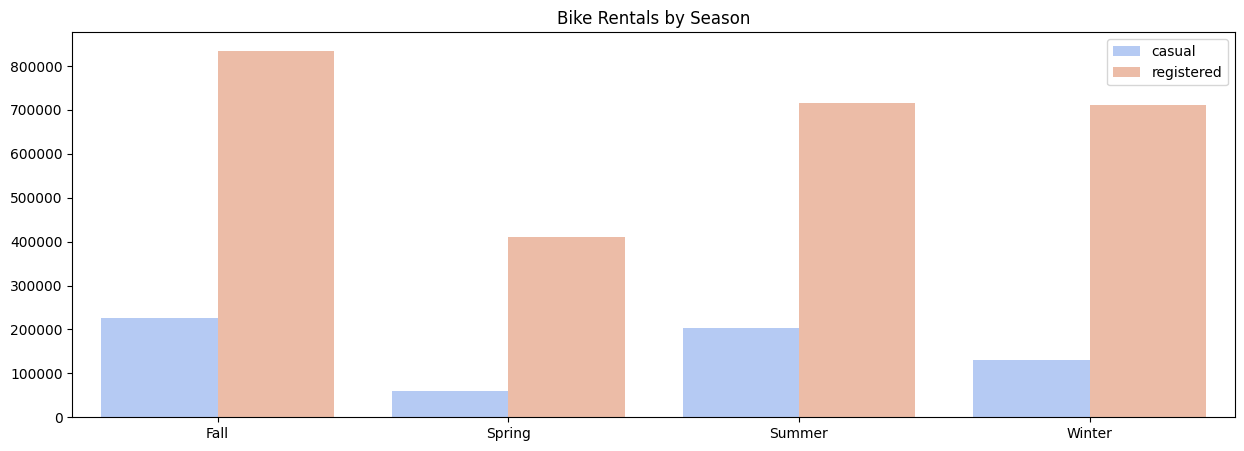

In [25]:
# membuat grouped bar chart
plt.figure(figsize=(15, 5))

sns.barplot(x='season', y='total', data=season_df, hue='user', errorbar=None, palette='coolwarm')

plt.title("Bike Rentals by Season", fontsize=12)
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

**Insight:**

Berdasarkan visualisasi di atas, terlihat bahwa peminjaman sepeda oleh pengguna registered jauh lebih banyak dibandingkan dengan pengguna casual di semua musim. Selain itu, total peminjaman tertinggi untuk  kedua tipe pengguna terjadi saat musim Fall, diikuti oleh Summer dan Winter. Musim Spring menjadi musim dengan total peminjaman terendah, terutama untuk pengguna casual.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?





In [26]:
# membentuk total data peminjaman oleh pengguna casual dan registered berdasarkan cuaca
weather_total = day_df.groupby('weather', observed=False)[['casual', 'registered']].mean().reset_index()

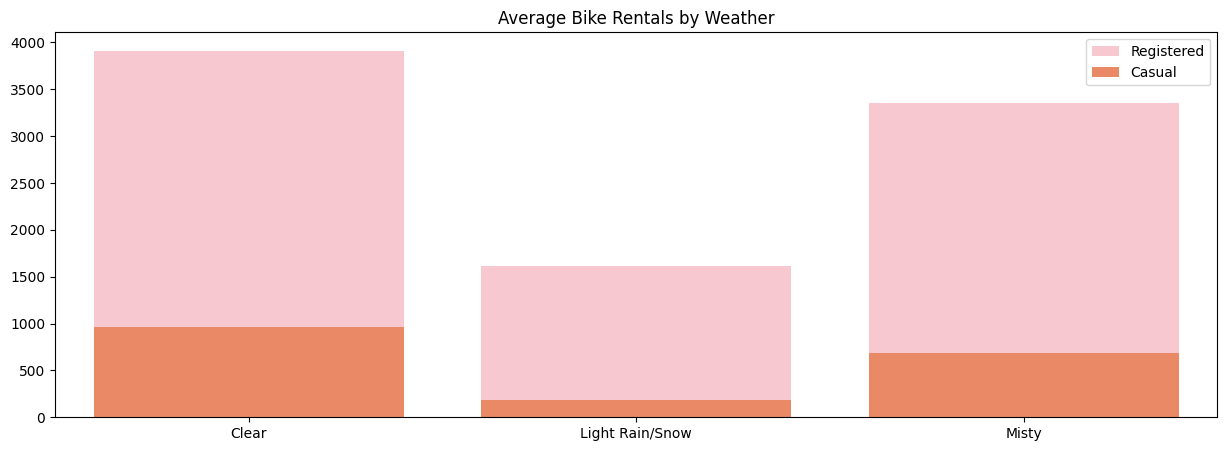

In [27]:
# membuat stacked bar chart
plt.figure(figsize=(15, 5))
sns.barplot(x='weather', y='registered', data=weather_total, label='Registered', color='pink')
sns.barplot(x='weather', y='casual', data=weather_total, label='Casual', color='coral')

plt.title("Average Bike Rentals by Weather", fontsize=12)
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

**Insight:**

Cuaca memiliki pengaruh yang signifikan dalam peminjaman sepeda. Berdasarkan visualisasi di atas, peminjaman sepeda, baik oleh pengguna casual dan registered, meningkat saat cuaca Clear, diikuti Misty, dan cenderung menurun saat cuaca Light Rain/Snow. Pola ini menunjukkan bahwa cuaca yang cerah lebih mendukung aktivitas bersepeda, sementara kondisi cuaca yang tidak terlalu baik mengurangi minat pengguna untuk beraktivitas menggunakan sepeda.

###Pertanyaan 3: Apakah ada perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur dalam dua tahun terakhir?

In [28]:
# membentuk data total peminjaman oleh pengguna casual dan registered berdasarkan cuaca
workingday_total = day_df.groupby('workingday', observed=False)[['casual', 'registered']].sum().reset_index()


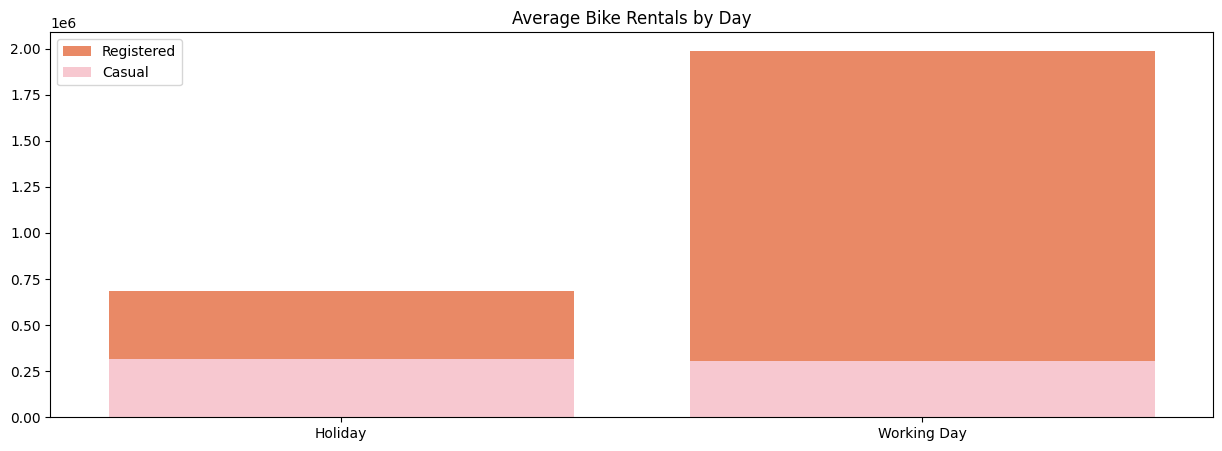

In [29]:
# membuat stacked bar chart
plt.figure(figsize=(15, 5))
sns.barplot(x='workingday', y='registered', data=workingday_total, label='Registered', color='coral')
sns.barplot(x='workingday', y='casual', data=workingday_total, label='Casual', color='pink')

plt.title("Average Bike Rentals by Day", fontsize=12)
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

**Insight:**

Berdasarkan visualisasi di atas, perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur, termasuk akhir pekan dan libur nasional, menunjukkan gap yang cukup besar. Menariknya, jumlah peminjaman sepeda oleh pengguna casual terlihat cukup sama antara hari kerja dan hari libur. Ini dapat mengindikasikan bahwa pengguna casual cenderung menggunakan sepeda untuk aktivitas santai yang tidak terikat oleh jadwal kerja. Sementara itu, pengguna registered memiliki jumlah peminjaman sepeda yang jauh lebih tinggi pada hari kerja dibandingkan hari libur. Ini dapat mengindikasikan bahwa kebanyakan pengguna registered menggunakan sepeda sebagai sarana transportasi utama.

###Pertanyaan 4: Bagaimana hubungan antara suhu sebenarnya dan suhu yang dirasakan terhadap jumlah peminjaman sepeda?

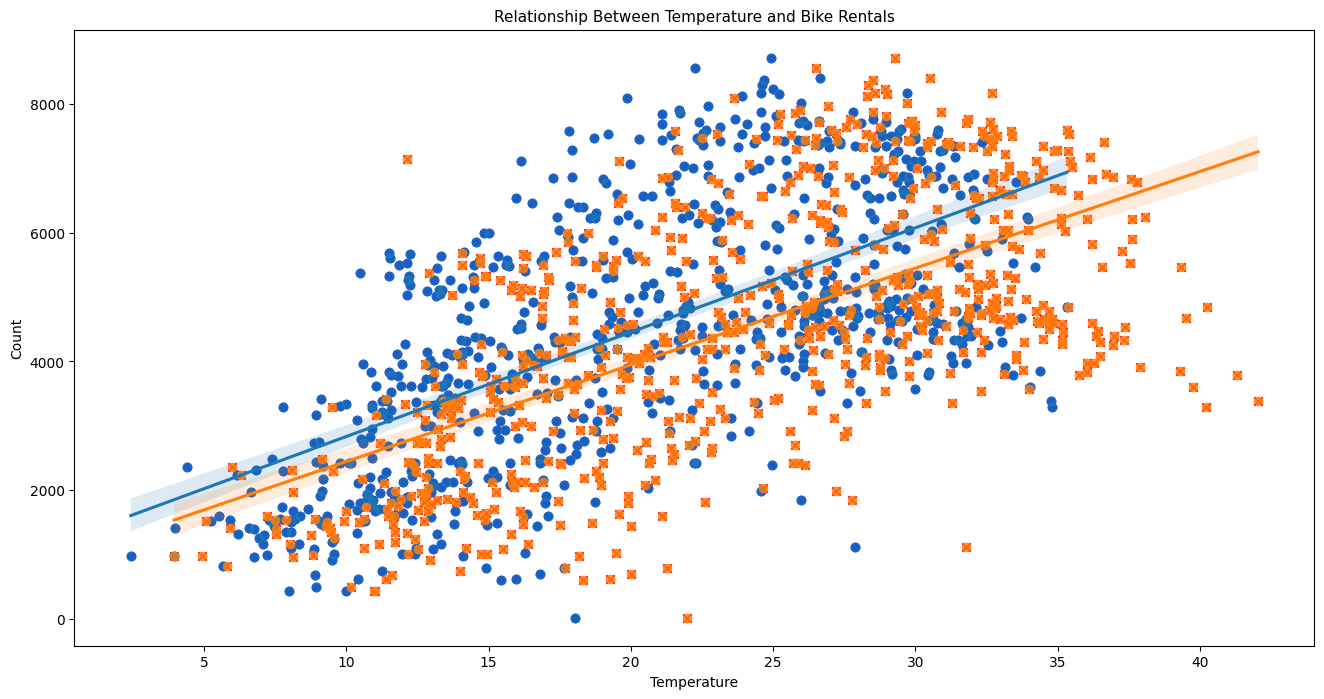

In [30]:
# plotting scatter plot
plt.figure(figsize=(16, 8))

plt.scatter(day_df['temp'], day_df['count'], color='blue', label='Temperature', marker='o')
plt.scatter(day_df['atemp'], day_df['count'], color='red', label='Feeling Temperature', marker='x')
sns.regplot(x=day_df['temp'], y=day_df['count'])
sns.regplot(x=day_df['atemp'], y=day_df['count'])

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Relationship Between Temperature and Bike Rentals', fontsize=11)
plt.show()


In [31]:
# memeriksa koefisien korelasi antara feeeling temperature dengan total peminajaman sepeda
day_df[['atemp', 'count']].corr()

,atemp,count
atemp,1.000000,0.631066
count,0.631066,1.000000


In [32]:
# memeriksa koefisien korelasi antara temperature dengan total peminjaman sepeda
day_df[['temp', 'count']].corr()

,temp,count
temp,1.000000,0.627494
count,0.627494,1.000000


**Insight:**

Visualisasi di atas menunjukkan adanya hubungan positif antara suhu sebenarnya (temp) dan suhu yang dirasakan (atemp) dengan jumlah peminjaman sepeda. Hal ini dapat mengindikasikan bahwa semakin hangat atau tinggi suhu, peminjaman sepeda cenderung meningkat. Selain itu, nilai koefisien korelasi mendukung hasil visualisasi, yang menunjukkan bahwa suhu yang dirasakan (atemp) memiliki pengaruh yang sedikit lebih kuat dibandingkan suhu sebenarnya (temp). Ini dapat diartikan bahwa kenyamanan pengguna terhadap suhu berperan penting dalam keputusan mereka untuk menggunakan sepeda. Namun, terdapat kemungkinan bahwa suhu yang terlalu tinggi justru dapat menurunkan minat pengguna akibat kondisi yang kurang nyaman untuk bersepeda.

###Pertanyaan 5: Bagaimana pengaruh kelembaban dan kecepatan angin terhadap jumlah peminjaman sepeda?

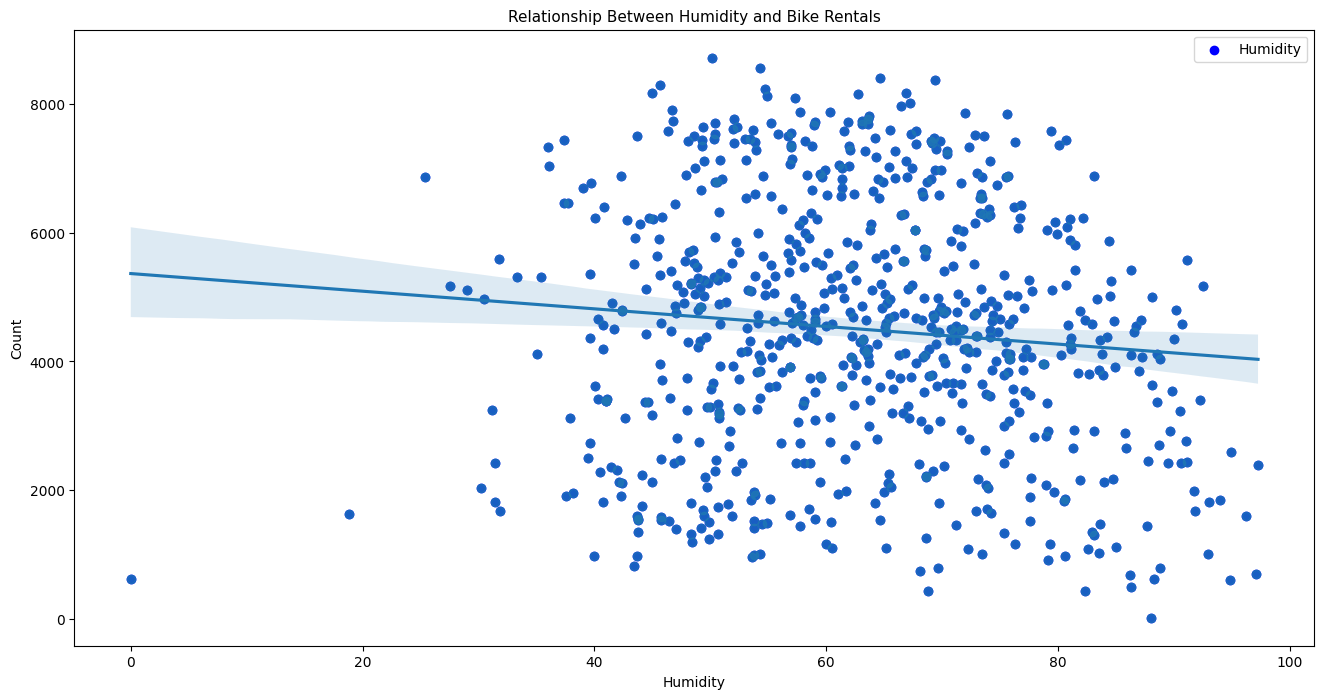

In [33]:
#plotting scatter plot
plt.figure(figsize=(16, 8))

plt.scatter(day_df['humidity'], day_df['count'], color='blue', label='Humidity', marker='o')
sns.regplot(x=day_df['humidity'], y=day_df['count'])

plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Relationship Between Humidity and Bike Rentals', fontsize=11)
plt.legend()
plt.show()

In [34]:
# memeriksa koefisien korelasi antara humidity dengan total peminjaman sepeda

day_df[['humidity', 'count']].corr()

,humidity,count
humidity,1.000000,-0.100659
count,-0.100659,1.000000


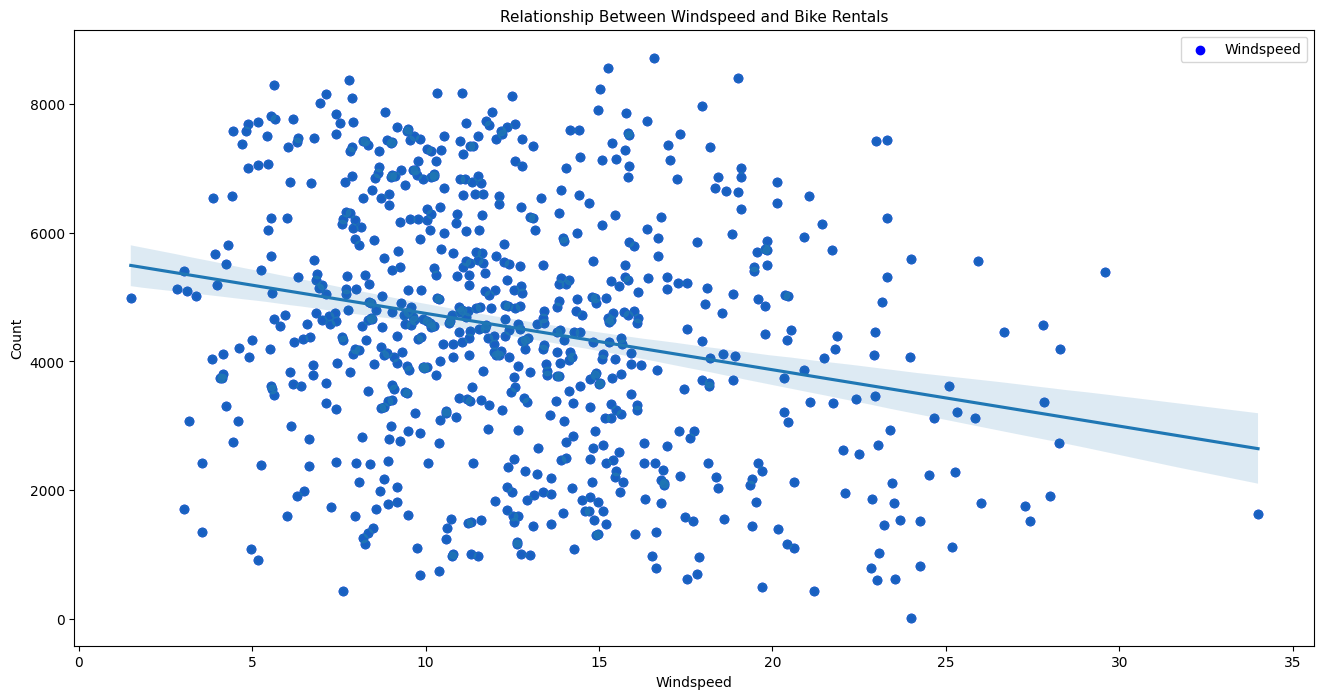

In [35]:
# plotting scatter plot
plt.figure(figsize=(16, 8))

plt.scatter(day_df['windspeed'], day_df['count'], color='blue', label='Windspeed', marker='o')
sns.regplot(x=day_df['windspeed'], y=day_df['count'])

plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.title('Relationship Between Windspeed and Bike Rentals', fontsize=11)
plt.legend()
plt.show()

In [36]:
# memeriksa koefisien korelasi antara windspeed dengan total peminjaman sepeda

day_df[['windspeed', 'count']].corr()

,windspeed,count
windspeed,1.000000,-0.234545
count,-0.234545,1.000000


**Insight:**

Berdasarkan visualisasi dan nilai korelasi antara kelembaban dan kecepatan angin dengan jumlah peminjaman sepeda, diketahui bahwa keduanya menunjukkan hubungan negatif yang lemah. Ini dapat diartikan bahwa kedua faktor tersebut tidak memiliki pengaruh yang signifikan terhadap perubahan jumlah peminjaman sepeda. Korelasi keduanya yang sangat rendah, yakni mendekati 0, menunjukkan bahwa kelembaban dan kecepatan angin bukanlah faktor utama yang menentukan tingkat peminjaman sepeda.

## Analisis Lanjutan (Opsional)

**Clustering**

Ini bertujuan untuk mengelompokkan variabel pengguna (casual, registered, dan count) berdasarkan frekuensi peminjaman sepeda per hari ke dalam kategori Low, Medium, dan High.


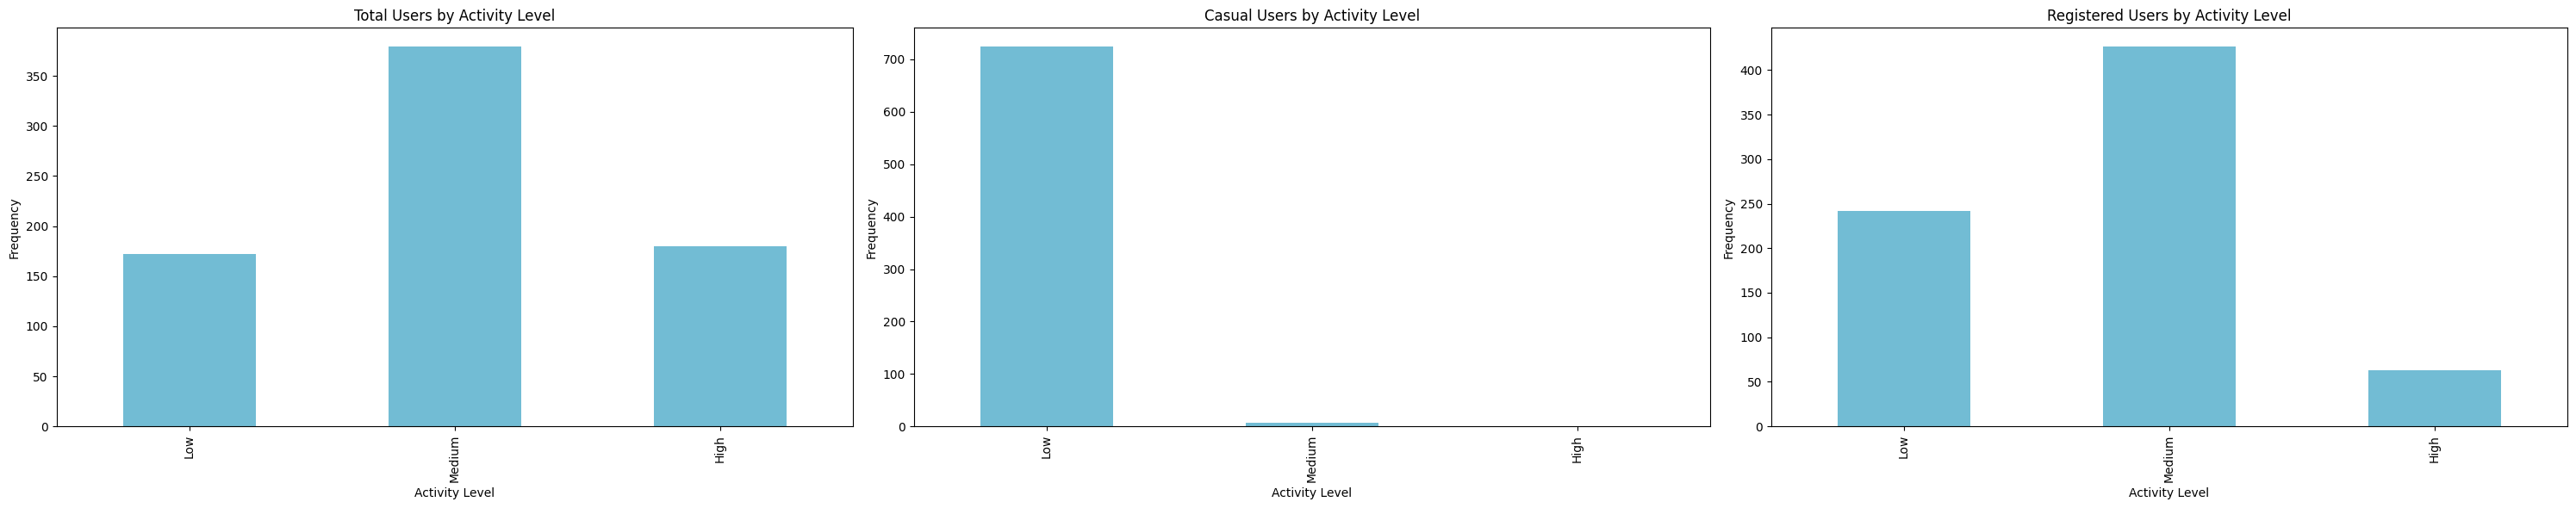

In [37]:
# Plotting bar chart
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

# Bar chart untuk 'count'
day_df['count_bins'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='#72BCD4')
ax[0].set_title('Total Users by Activity Level')
ax[0].set_xlabel('Activity Level')
ax[0].set_ylabel('Frequency')

# Bar chart untuk 'casual'
day_df['casual_bins'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='#72BCD4')
ax[1].set_title('Casual Users by Activity Level')
ax[1].set_xlabel('Activity Level')
ax[1].set_ylabel('Frequency')

# Bar chart untuk 'registered'
day_df['registered_bins'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='#72BCD4')
ax[2].set_title('Registered Users by Activity Level')
ax[2].set_xlabel('Activity Level')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Insight:

- Frekuensi peminjaman sepeda perhari oleh pengguna registered cenderung berada pada tingkat sedang hingga tinggi. Ini menunjukkan bahwa mereka lebih sering menggunakan sepeda dalam kehidupan sehari-hari, mungkin untuk tujuan komuter seperti berangkat kerja atau sekolah.
- Frekuensi peminjaman sepeda per hari oleh pengguna casual cenderung berada pada tingkat rendah hingga sedang. Ini dapat mengindikasikan bahwa kebanyakan pengguna casual menggunakan sepeda hanya untuk rekreasi atau kegiatan sesekali, misalnya bersepeda di akhir pekan atau selama liburan.

## Conclusion

- Pola peminjaman sepeda yang dilakukan oleh seluruh pengguna tidak hanya dipengaruhi oleh satu faktor, melainkan oleh berbagai faktor lain yang saling berkaitan, seperti musim, kondisi cuaca, kebutuhan akomodasi, serta faktor lingkungan seperti kelembaban dan kecepatan angin.
- Terdapat perbedaan yang signifikan antara jumlah peminjaman sepeda oleh pengguna registered dan pengguna casual, di mana sebagian besar peminjaman sepeda didominasi oleh pengguna registered.
- Perbedaan mencolok dari pengguna registered dan casual terletak pada pola peminjaman mereka. Dalam hal ini, pengguna registered cenderung lebih sering melakukan peminjaman sepeda pada hari kerja dan menurun pada akhir pekan. Sebaliknya, pengguna casual lebih dominan melakukan peminjaman sepeda pada akhir pekan dibandingkan pada hari kerja.